### Loading Log file

In [36]:
import os
from pm4py.objects.log.importer.xes import factory as xes_import_factory

parameters = {"timestamp_sort": True}

log = xes_import_factory.apply("../data/prlog_lifecycle.xes", variant="nonstandard", parameters=parameters)

### Petri net graph using alpha miner

In [37]:
from pm4py.algo.discovery.alpha import factory as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

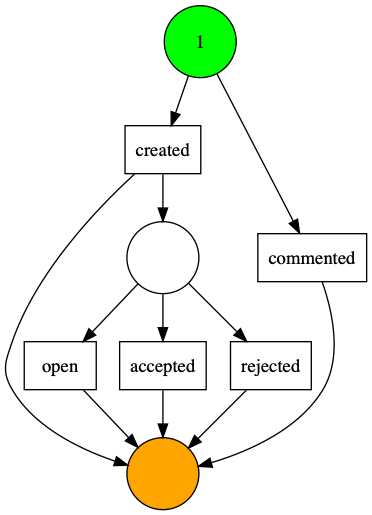

In [38]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

The place colored green is the source place and belongs to the initial marking. In the initial marking, a token is assigned to that place (indicated by the number 1 on the place). The place colored orange is the sink place and belongs to the final marking. We see that transitions here correspond to activities in the log. Models extracted by the Alpha Miner often have deadlock problems, so it is not sure that each trace is replayable on this model.

### Applying the Heuristics Miner to discover an Heuristics Net

In [39]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.99})

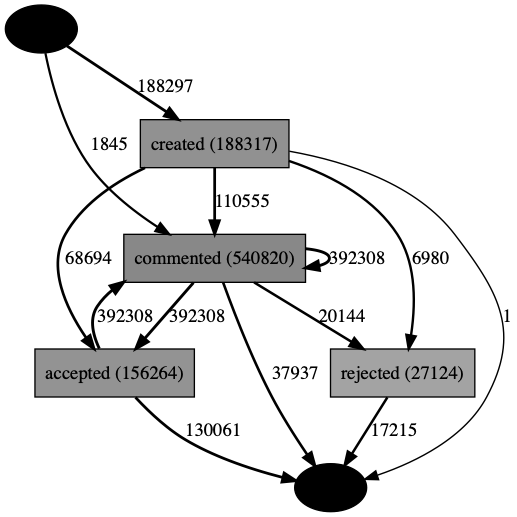

In [40]:
from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

### Applying the Heuristics Miner to discover a Petri Net graph

In [41]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
net, im, fm = heuristics_miner.apply(log, parameters={"dependency_thresh": 0.99})

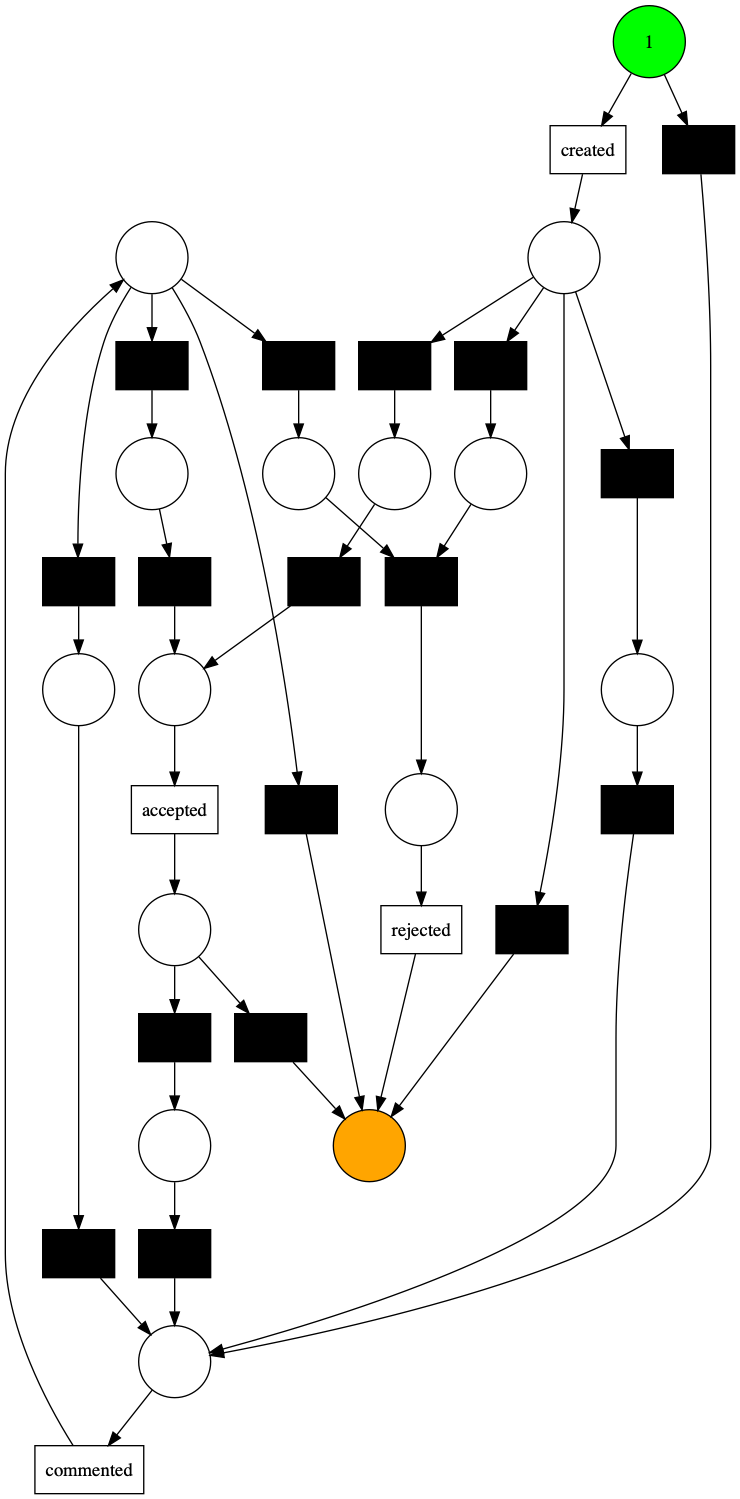

In [42]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

### SIMPLE algorithm

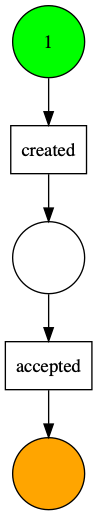

In [43]:
from pm4py.algo.discovery.simple.model.log import factory as simple_algorithm

net, initial_marking, final_marking = simple_algorithm.apply(log, classic_output=True)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

SIMPLE is an algorithm provided in PM4Py that selectively applies the Alpha Miner to the top variants of the log, in order to retrieve a sound workflow net from the log. The algorithm works on logs as follows:

- An auto filter (see the Filtering logs page) is applied to the end activities of the log (to remove incomplete traces).

- An auto filter (see the Filtering logs page) is applied to the start activities of the log (to remove traces with inusual start activities).

- The variants of the log are retrieved and ordered by the number of their occurrences

- For each variant having the top-N occurrences (where N is specified by the user), starting from the most frequent one:
    - The addition of the variant to a filtered log is done
    - The Alpha Miner is applied
    - The soundness and the replayability (on the filtered log) of the Petri net is checked
    - If the network is not sound or not replayable, then the given variant is removed from the filtered log

### Petri net graph using inductive miner IMDFb

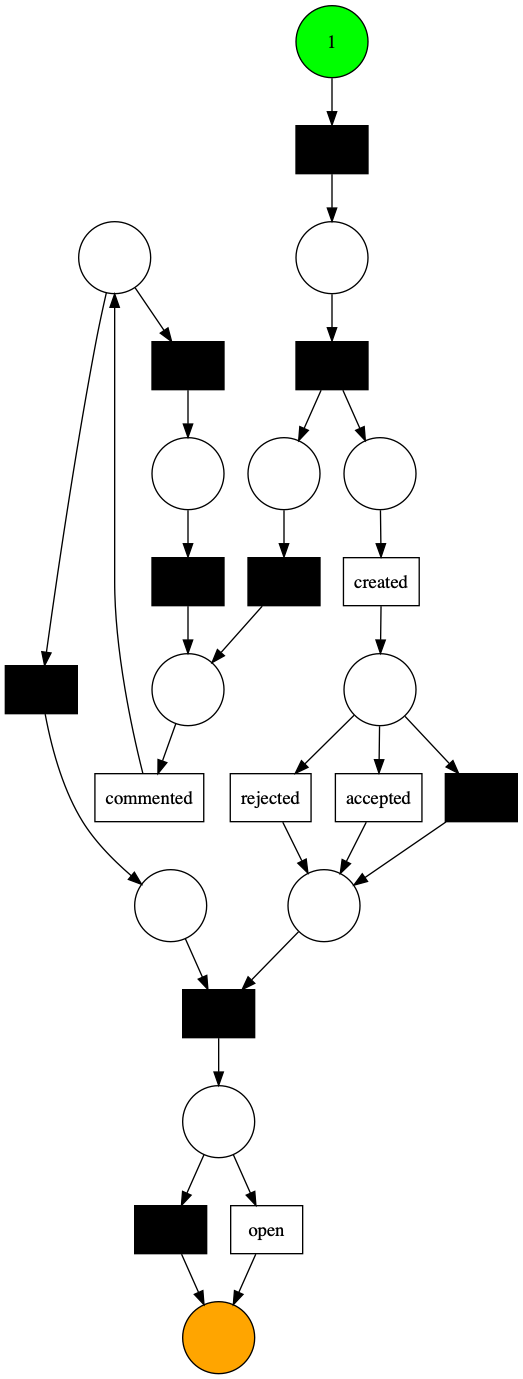

In [64]:
from pm4py.algo.discovery.inductive import factory as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(log)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

### Inductive process tree

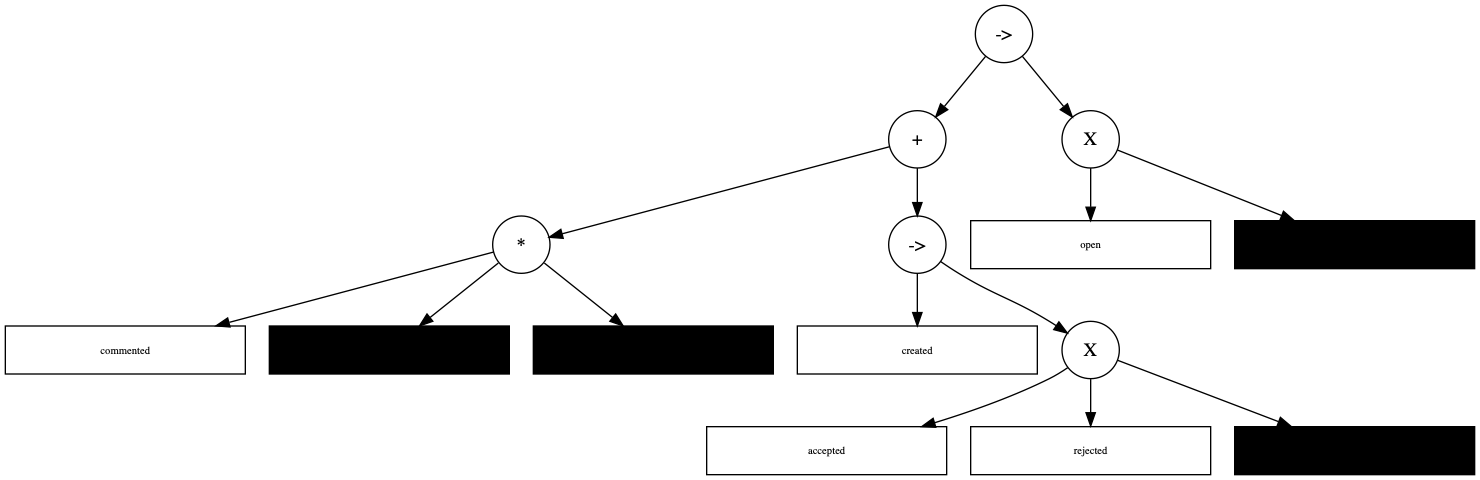

In [45]:
from pm4py.algo.discovery.inductive import factory as inductive_miner

tree = inductive_miner.apply_tree(log)

from pm4py.visualization.process_tree import factory as pt_vis_factory

gviz = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz)

### process tree converted to a Petri net

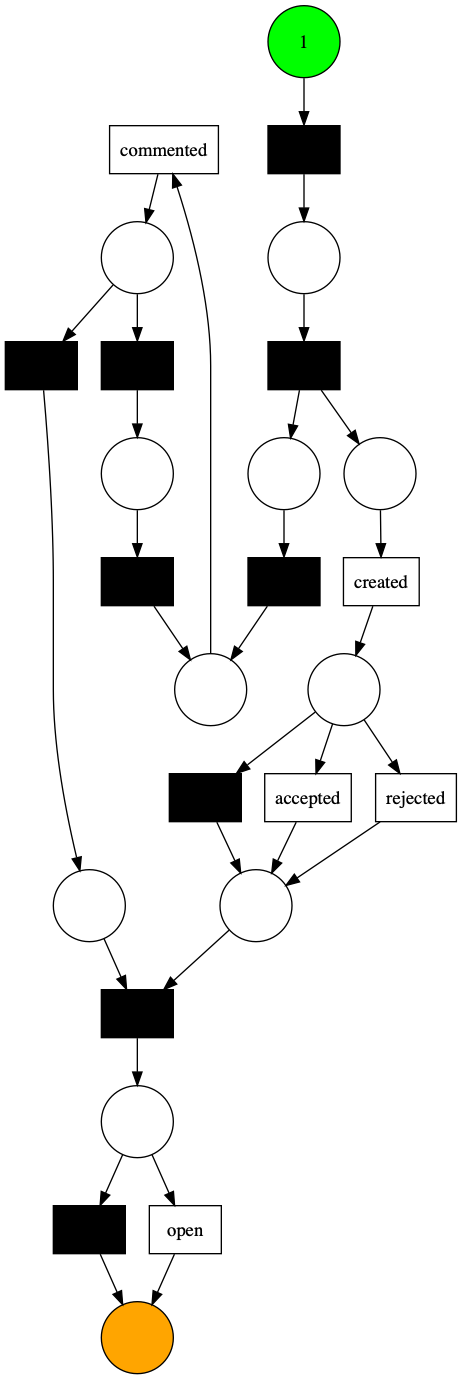

In [46]:
from pm4py.objects.conversion.process_tree import factory as pt_conv_factory

net, initial_marking, final_marking = pt_conv_factory.apply(tree, variant=pt_conv_factory.TO_PETRI_NET)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

### A colored visualization of the Directly-Follows graph decorated with the frequency of activities and edges

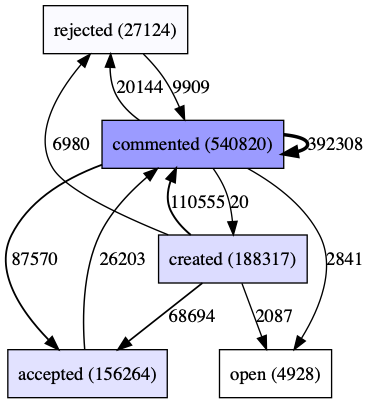

In [49]:
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory

dfg = dfg_factory.apply(log)
gviz = dfg_vis_factory.apply(dfg, log=log, variant="frequency")
dfg_vis_factory.view(gviz)

### A colored visualization of the Directly-Follows graph decorated with the performance of activities and edges

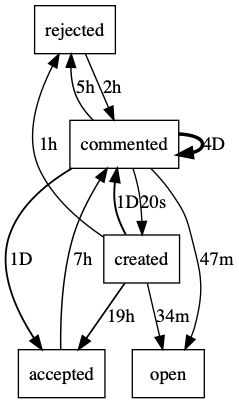

In [66]:
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory

dfg = dfg_factory.apply(log)
gviz = dfg_vis_factory.apply(dfg, log=log, variant="performance")
dfg_vis_factory.view(gviz)

### Petri net mined by the Inductive Miner decorated with frequency information

In [65]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

parameters = {"format":"png"}
gviz = pn_vis_factory.apply(net, initial_marking, final_marking, parameters=parameters,variant='performance', log=log)
pn_vis_factory.view(gviz)

TypeError: unsupported operand type(s) for -: 'str' and 'str'